<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/SQL_Real_Estate_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Rental Income by Property:
          Property Name  Total Income
0           Adams Arena        1600.0
1    Bush Business Park        4400.0
2     Clinton Clubhouse        1500.0
3   Concord Scout House        7350.0
4        Franklin Tower        1400.0
5       Hawthorne House        2100.0
6        Jackson Center        3375.0
7       Jefferson Plaza        2700.0
8         Kennedy Court        2400.0
9         Lincoln Lodge        1750.0
10         Madison Hall        2275.0
11       Monroe Mansion        1100.0
12     Reagan Residence        1440.0
13   Riverside Pavilion        1800.0
14    Roosevelt Retreat        1350.0
15    Washington Square        2500.0


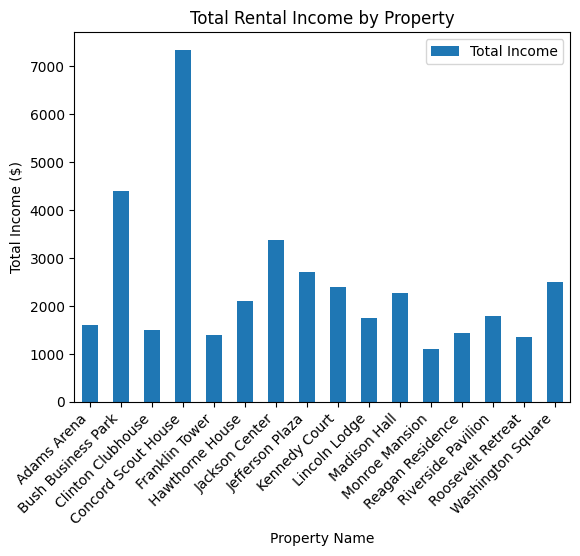

Rental History of Customer ID 1:
  FirstName LastName        Property Name Rental Date  Rental Duration (days)  \
0      John      Doe  Concord Scout House  2024-06-01                       5   
1      John      Doe  Concord Scout House  2024-06-20                       1   
2      John      Doe  Concord Scout House  2024-07-10                       2   
3      John      Doe  Concord Scout House  2024-08-01                       3   
4      John      Doe   Bush Business Park  2024-10-25                       3   

   Rental Amount  
0          750.0  
1          150.0  
2          300.0  
3          450.0  
4         1650.0  

Ethical Reflection:
The ethical considerations discussed in 'How to Lie with Statistics' guide us to present data accurately and transparently.
By using SQL queries to retrieve actual rental data, we ensure that our analysis is based on real and verifiable information.
Our use of business intelligence techniques such as data visualization further enhances the cla

In [ ]:
# Step 1: Setting Up the Environment
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('real_estate.db')
cursor = conn.cursor()

# Create Customers table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customers (
        CustomerID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Email TEXT,
        PhoneNumber TEXT
    )
''')

# Create Properties table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Properties (
        PropertyID INTEGER PRIMARY KEY,
        PropertyName TEXT,
        Location TEXT,
        PropertyType TEXT,
        RentalPrice REAL
    )
''')

# Create Rentals table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Rentals (
        RentalID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        PropertyID INTEGER,
        RentalDate DATE,
        RentalDuration INTEGER,
        RentalAmount REAL,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
        FOREIGN KEY (PropertyID) REFERENCES Properties(PropertyID)
    )
''')

# Insert sample data into Customers table
cursor.execute('''
    INSERT OR IGNORE INTO Customers (CustomerID, FirstName, LastName, Email, PhoneNumber)
    VALUES (1, 'John', 'Doe', 'john.doe@example.com', '123-456-7890'),
           (2, 'Jane', 'Smith', 'jane.smith@example.com', '098-765-4321'),
           (3, 'Alice', 'Johnson', 'alice.johnson@example.com', '234-567-8901'),
           (4, 'Bob', 'Brown', 'bob.brown@example.com', '345-678-9012'),
           (5, 'Charlie', 'Davis', 'charlie.davis@example.com', '456-789-0123'),
           (6, 'Daisy', 'Miller', 'daisy.miller@example.com', '567-890-1234'),
           (7, 'Eve', 'Wilson', 'eve.wilson@example.com', '678-901-2345'),
           (8, 'Frank', 'Moore', 'frank.moore@example.com', '789-012-3456'),
           (9, 'Grace', 'Taylor', 'grace.taylor@example.com', '890-123-4567'),
           (10, 'Hank', 'Anderson', 'hank.anderson@example.com', '901-234-5678'),
           (11, 'Ivy', 'Thomas', 'ivy.thomas@example.com', '012-345-6789'),
           (12, 'Jack', 'Jackson', 'jack.jackson@example.com', '123-456-7891'),
           (13, 'Kathy', 'White', 'kathy.white@example.com', '234-567-8902'),
           (14, 'Liam', 'Harris', 'liam.harris@example.com', '345-678-9013'),
           (15, 'Mia', 'Clark', 'mia.clark@example.com', '456-789-0124'),
           (16, 'Noah', 'Lewis', 'noah.lewis@example.com', '567-890-1235'),
           (17, 'Olivia', 'Lee', 'olivia.lee@example.com', '678-901-2346'),
           (18, 'Paul', 'Walker', 'paul.walker@example.com', '789-012-3457'),
           (19, 'Quinn', 'Hall', 'quinn.hall@example.com', '890-123-4568'),
           (20, 'Ruth', 'Allen', 'ruth.allen@example.com', '901-234-5679'),
           (21, 'Sam', 'Young', 'sam.young@example.com', '012-345-6790'),
           (22, 'Tina', 'King', 'tina.king@example.com', '123-456-7892'),
           (23, 'Uma', 'Scott', 'uma.scott@example.com', '234-567-8903'),
           (24, 'Vince', 'Green', 'vince.green@example.com', '345-678-9014'),
           (25, 'Wendy', 'Adams', 'wendy.adams@example.com', '456-789-0125'),
           (26, 'Xander', 'Baker', 'xander.baker@example.com', '567-890-1236'),
           (27, 'Yara', 'Carter', 'yara.carter@example.com', '678-901-2347'),
           (28, 'Zane', 'Evans', 'zane.evans@example.com', '789-012-3458'),
           (29, 'Laura', 'Brooks', 'laura.brooks@example.com', '890-123-4569'),
           (30, 'Michael', 'Price', 'michael.price@example.com', '901-234-5680')
''')

# Insert sample data into Properties table
cursor.execute('''
    INSERT OR IGNORE INTO Properties (PropertyID, PropertyName, Location, PropertyType, RentalPrice)
    VALUES (1, 'Concord Scout House', 'Concord, MA', 'Event Space', 150.00),
           (2, 'Riverside Pavilion', 'Concord, MA', 'Event Space', 200.00),
           (3, 'Hawthorne House', 'Lexington, MA', 'Residential', 300.00),
           (4, 'Washington Square', 'Boston, MA', 'Commercial', 500.00),
           (5, 'Lincoln Lodge', 'Lincoln, MA', 'Residential', 250.00),
           (6, 'Adams Arena', 'Cambridge, MA', 'Event Space', 400.00),
           (7, 'Jefferson Plaza', 'Somerville, MA', 'Commercial', 450.00),
           (8, 'Franklin Tower', 'Quincy, MA', 'Commercial', 350.00),
           (9, 'Jackson Center', 'Newton, MA', 'Event Space', 375.00),
           (10, 'Madison Hall', 'Waltham, MA', 'Event Space', 325.00),
           (11, 'Monroe Mansion', 'Brookline, MA', 'Residential', 275.00),
           (12, 'Roosevelt Retreat', 'Arlington, MA', 'Residential', 225.00),
           (13, 'Kennedy Court', 'Medford, MA', 'Commercial', 600.00),
           (14, 'Reagan Residence', 'Woburn, MA', 'Residential', 240.00),
           (15, 'Bush Business Park', 'Everett, MA', 'Commercial', 550.00),
           (16, 'Clinton Clubhouse', 'Chelsea, MA', 'Event Space', 300.00)
''')

# Insert sample data into Rentals table
# Ensure each property has rental entries
cursor.execute('''
    INSERT OR IGNORE INTO Rentals (RentalID, CustomerID, PropertyID, RentalDate, RentalDuration, RentalAmount)
    VALUES (1, 1, 1, '2024-06-01', 5, 750.00),
           (2, 2, 2, '2024-06-05', 4, 800.00),
           (3, 3, 3, '2024-06-10', 3, 900.00),
           (4, 4, 4, '2024-06-15', 2, 1000.00),
           (5, 5, 5, '2024-06-20', 1, 250.00),
           (6, 6, 6, '2024-06-25', 5, 2000.00),
           (7, 7, 7, '2024-07-01', 4, 1800.00),
           (8, 8, 8, '2024-07-05', 3, 1050.00),
           (9, 9, 9, '2024-07-10', 2, 750.00),
           (10, 10, 10, '2024-07-15', 1, 325.00),
           (11, 11, 11, '2024-07-20', 5, 1375.00),
           (12, 12, 12, '2024-07-25', 4, 900.00),
           (13, 13, 13, '2024-08-01', 3, 1800.00),
           (14, 14, 14, '2024-08-05', 2, 480.00),
           (15, 15, 15, '2024-08-10', 1, 550.00),
           (16, 16, 16, '2024-08-15', 5, 1500.00),
           (17, 17, 1, '2024-08-20', 2, 300.00),
           (18, 18, 2, '2024-08-25', 3, 600.00),
           (19, 19, 3, '2024-08-30', 4, 1200.00),
           (20, 20, 4, '2024-09-01', 1, 500.00),
           (21, 21, 5, '2024-09-05', 2, 500.00),
           (22, 22, 6, '2024-09-10', 3, 1200.00),
           (23, 23, 7, '2024-09-15', 4, 1800.00),
           (24, 24, 8, '2024-09-20', 1, 350.00),
           (25, 25, 9, '2024-09-25', 5, 1875.00),
           (26, 26, 10, '2024-09-30', 2, 650.00),
           (27, 27, 11, '2024-10-05', 3, 825.00),
           (28, 28, 12, '2024-10-10', 4, 900.00),
           (29, 29, 13, '2024-10-15', 1, 600.00),
           (30, 30, 14, '2024-10-20', 2, 480.00),
           (31, 1, 15, '2024-10-25', 3, 1650.00),
           (32, 2, 16, '2024-10-30', 4, 1200.00),
           (33, 3, 1, '2024-11-01', 1, 150.00),
           (34, 4, 2, '2024-11-05', 2, 400.00),
           (35, 5, 3, '2024-11-10', 3, 900.00),
           (36, 6, 4, '2024-11-15', 4, 2000.00),
           (37, 7, 5, '2024-11-20', 5, 1250.00),
           (38, 8, 6, '2024-11-25', 1, 400.00),
           (39, 9, 7, '2024-12-01', 2, 900.00),
           (40, 10, 8, '2024-12-05', 3, 1050.00),
           (41, 11, 9, '2024-12-10', 4, 1500.00),
           (42, 12, 10, '2024-12-15', 5, 1625.00),
           (43, 13, 11, '2024-12-20', 1, 275.00),
           (44, 14, 12, '2024-12-25', 2, 450.00),
           (45, 15, 13, '2024-12-30', 3, 1800.00),
           (46, 16, 14, '2025-01-01', 4, 960.00),
           (47, 17, 15, '2025-01-05', 5, 2750.00),
           (48, 18, 16, '2025-01-10', 1, 300.00)
''')

# Commit changes
conn.commit()

# Step 2: SQL Queries and BI Techniques
# Query total rental income by property
total_income_query = '''
    SELECT PropertyName AS "Property Name", SUM(RentalAmount) AS "Total Income"
    FROM Rentals
    JOIN Properties ON Rentals.PropertyID = Properties.PropertyID
    GROUP BY PropertyName
'''

total_income_df = pd.read_sql_query(total_income_query, conn)

# Display total rental income by property
print("Total Rental Income by Property:")
print(total_income_df)

# Visualize total rental income by property
total_income_df.plot(kind='bar', x='Property Name', y='Total Income', title='Total Rental Income by Property')
plt.xlabel('Property Name')
plt.ylabel('Total Income ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Query rental history of a specific customer (CustomerID = 1)
rental_history_query = '''
    SELECT Customers.FirstName, Customers.LastName, Properties.PropertyName AS "Property Name",
           Rentals.RentalDate AS "Rental Date", Rentals.RentalDuration AS "Rental Duration (days)", Rentals.RentalAmount AS "Rental Amount"
    FROM Rentals
    JOIN Customers ON Rentals.CustomerID = Customers.CustomerID
    JOIN Properties ON Rentals.PropertyID = Properties.PropertyID
    WHERE Customers.CustomerID = 1
'''

rental_history_df = pd.read_sql_query(rental_history_query, conn)

# Display rental history of a specific customer
print("Rental History of Customer ID 1:")
print(rental_history_df)

# Step 3: Ethical Reflection
# Reflecting on ethical considerations
def reflect_on_ethics():
    print("\nEthical Reflection:")
    print("The ethical considerations discussed in 'How to Lie with Statistics' guide us to present data accurately and transparently.")
    print("By using SQL queries to retrieve actual rental data, we ensure that our analysis is based on real and verifiable information.")
    print("Our use of business intelligence techniques such as data visualization further enhances the clarity")
    print("and accessibility of our insights. We also make sure to not present the data how we like, by manipulating the y-axis,")
    print("but rather adhere to ethical data practices that allow us to present the data accurate and not mislead the acquirer of data.")

reflect_on_ethics()

# Close the database connection
conn.close()
